<div align='Center'><font size="7" color="#51ABDA">First NLP Analysis</font></div>

<div align='left'><font size="5" color="#51ABDA">Introduction</font></div>
This is my first NLP Analysis kernal.It was really hard journey to finish it. But I'm very proud of myself.
<hr>


<div align='left'><font size="5" color="#51ABDA">Goal</font></div>
prediction of `selected_text` into submission file by modeling

# Structure

* <a href="#sec1">1. Preliminary step</a>
 * <a href="#sec1.1"> 1.1. Jaccard score </a>
 * <a href="#sec1.2"> 1.2. Importing prerequisite libraries</a>
 * <a href="#sec1.3"> 1.3. Reading datasets</a>
 

* <a href="#sec2">2. Exploratory Data Analysis(EDA)</a>
  * <a href="#sec2.1"> 2.1. Missing values </a>
  * <a href="#sec2.2"> 2.2. Incorrect datatype</a>
  * <a href="#sec2.3"> 2.3. Sampling of Sentiment</a>
  * <a href="#sec2.4"> 2.4. Data Visualization</a>
    * <a href="#sec2.4.1"> sentiment proportion</a>   
    * <a href="#sec2.4.2"> Add new feature</a> 
    * <a href="#sec2.4.3"> Text data analysis</a>   
    
    
* <a href="#sec3"> 3. Text data preprocessing</a>
  * <a href="#sec3.1"> 3.1. Contraction mapping</a>
  * <a href="#sec3.2"> 3.2. Cleaning Corpus</a>
  * <a href="#sec3.3"> 3.3. Remove stopwords</a>


* <a href="#sec4"> 4. Word Analysis</a>
  * <a href="#sec4.1"> 4.1. Frequency</a>
  * <a href="#sec4.2"> 4.2. Word cloud</a> 
   
   
* <a href="#sec5">5. PLUS</a>
 * <a href="#sec5.1"> 5.1. Spelling corector</a>
 * <a href="#sec5.2"> 5.2. Removing weird spaces</a> 
* <a href="#sec6">6. Ending</a>

<a id='sec1'></a>
# 1. Preliminary step

<a id='sec1.1'></a>
## 1.1 Jaccard score

I got a lof of helps about `Jaccard score` from [Parul's kernal](https://www.kaggle.com/parulpandey/eda-and-preprocessing-for-bert). Be sure to check out !!

In [1]:
# Numeric 
from math import*
 
def jaccard_numeric_values(x,y):
 
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)
 
jaccard_numeric_values([0,1,2,5,6],[0,2,3,5,7,9])

0.375

In [2]:
def jaccard_string(str1,str2):
    
    x = set(str1.lower().split())
    y = set(str2.lower().split())
    # convert String with lowercase and then split it
    
    z = x.intersection(y)
    t = x.union(y)
    # Alternative  : instead of t = x.union(y) you can write (len(x) + len(y) - len(z))
    return float(len(z)) / float(len(t))


Sentence_1 = 'I am a data scientist at Google'
Sentence_2 = 'I am a software engineer at Google'
Sentence_3 = 'I am a software engineer at Microsoft'

    
print(jaccard_string(Sentence_1,Sentence_2))
print(jaccard_string(Sentence_1,Sentence_3))
print(jaccard_string(Sentence_2,Sentence_3))

0.5555555555555556
0.4
0.75


<a id='sec1.2'></a>
## 1.2 Importing prerequisite libraries

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import os
import numpy as np
import pandas as pd


# sklearn
from sklearn import model_selection,metrics
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Modeling 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
import xgboost as xgb


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

<a id='sec1.3'></a>
## 1.3 Reading datasets

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
# First 5 rows of trains data
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [6]:
# shape of train data
rows = train.shape[0]
columns = train.shape[1]
print('The number of rows in train data are {0} and columns are {1}'.format(rows,columns))

The number of rows in train data are 27481 and columns are 4


In [7]:
# First 5 rows of test data
test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [8]:
# shape of train data
rows = test.shape[0]
columns = test.shape[1]
print('The number of rows in train data are {0} and columns are {1}'.format(rows,columns))

The number of rows in train data are 3534 and columns are 3


<a name="sec2"></a>
# 2. Exploratory Data Analysis (EDA)

<a name="sec2.1"></a>
### 2.1 Missing Value & Duplication

In [9]:
train.isnull().sum()
# checking null value in train data
test.isnull().sum()
# checking null value in test data

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

textID       0
text         0
sentiment    0
dtype: int64

Observation 

> We have one null value in train data. We need to drop out it

In [10]:
train.dropna(axis = 0, how ='any',inplace=True) 

In [11]:
sum(train.duplicated())

0

> Observation 

No Duplication

<a name="sec2.2"></a>
### 2.2 Incorrect datatype

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
textID           27480 non-null object
text             27480 non-null object
selected_text    27480 non-null object
sentiment        27480 non-null object
dtypes: object(4)
memory usage: 1.0+ MB


Observtion

> right datatype : Object(String)

<a name="sec2.3"></a>
### 2.3 Sampling of sentiment

In [13]:
print('sample of positive sentiment: ',train[train['sentiment']=='positive']['selected_text'].sample())
print('sample of negative sentiment: ',train[train['sentiment']=='negative']['selected_text'].sample())
print('sample of neutral sentiment: ',train[train['sentiment']=='neutral']['selected_text'].sample())

sample of positive sentiment:  15928    enjoying
Name: selected_text, dtype: object
sample of negative sentiment:  14955    **** my life...
Name: selected_text, dtype: object
sample of neutral sentiment:  14854    You have to come to Chile... with AC/DC would ...
Name: selected_text, dtype: object


<a name="sec2.4"></a>
### 2.4 Data Visualization 

<a name="sec2.4.1"></a>
### Sentiment proportion

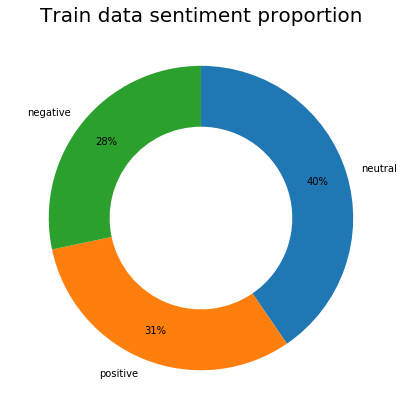

In [14]:
# Pie charts 
plt.figure(figsize=(17,7)) 
sorted_counts = train['sentiment'].value_counts()
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');

plt.title('Train data sentiment proportion',fontsize=20);

Observation 

> **Neutral : 40% > Positive : 31% > Negative : 28%**. Accroding to the train data 40% of selected text are not allocted into either positve or negative.That means there are a lot of cases which are not clear to judge whether Sentiment is expressed or not

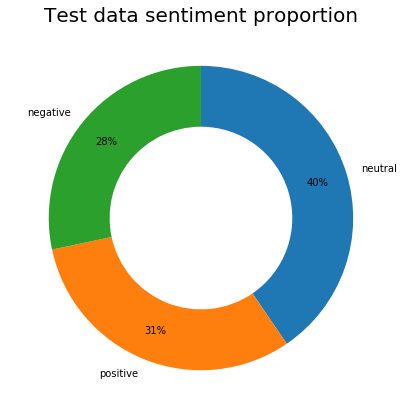

In [15]:
# Pie charts 
plt.figure(figsize=(17,7)) 
sorted_counts = test['sentiment'].value_counts()
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');

plt.title('Test data sentiment proportion',fontsize=20);

Observation 

> Same as train data

<a name="sec2.4.2"></a>
### Add new feature 

As we know our goal is that we predict selected_text in submission file. So it's more meaningful that we add new feature on the dataframe.


### First : Jaccard score

In [16]:
def jaccard_string(str1,str2):
    
    x = set(str1.lower().split())
    y = set(str2.lower().split())
    
    z = x.intersection(y)
    t = x.union(y)
    return float(len(z)) / float(len(t))

# Just remember the beginning of this kernel. I introduced the jaccard score with python code. Copy it !!

In [17]:
jaccard_score = []

for rows in train.itertuples():
    # another option : for index,rows in iterrows(), but in this case itertuples is faster than iterrows
    # Iterate over DataFrame rows as namedtuples.
    sentence1 = rows.text
    # first we saved text column as sentence 1 
    sentence2 = rows.selected_text
    # second we saved selected_text column as sentence 2

    
    jaccard_result = jaccard_string(sentence1,sentence2)
    # Now we apply jaccard score algoritum in sentnce 1,2

    jaccard_score.append([sentence1,sentence2,jaccard_result])
    # append sentence

In [18]:
jaccard = pd.DataFrame(jaccard_score,columns=['text','selected_text','jaccard score'])
# save in dataframe

In [19]:
jaccard.head()

,text,selected_text,jaccard score
0,"I`d have responded, if I were going","I`d have responded, if I were going",1.000000
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0.200000
2,my boss is bullying me...,bullying me,0.166667
3,what interview! leave me alone,leave me alone,0.600000
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0.214286


In [20]:
train=train.merge(jaccard,how='outer')
train.head()

# jaccard dataframe is merged with train data

,textID,text,selected_text,sentiment,jaccard score
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286


### Second : number of word and difference

In [21]:
train['number of word in T'] = train['text'].apply(lambda x : len(str(x).split() ))   # number of word in Text
train['number of word in ST'] = train['selected_text'].apply(lambda x : len(str(x).split() )) # number of word in Selected_text

train['difference'] = train['number of word in T'] - train['number of word in ST']

In [22]:
train.head()

,textID,text,selected_text,sentiment,jaccard score,number of word in T,number of word in ST,difference
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000,10,2,8
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667,5,2,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000,5,3,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286,14,3,11


Observation 

finally we have jaccard and difference in number of word between `text` and `selected_text`

<a name="sec2.4.3"></a>
### Text data analysis

In [23]:
positive = train[train['sentiment']=='positive']
negative = train[train['sentiment']=='negative']
neutral = train[train['sentiment']=='neutral']

**First : Text**

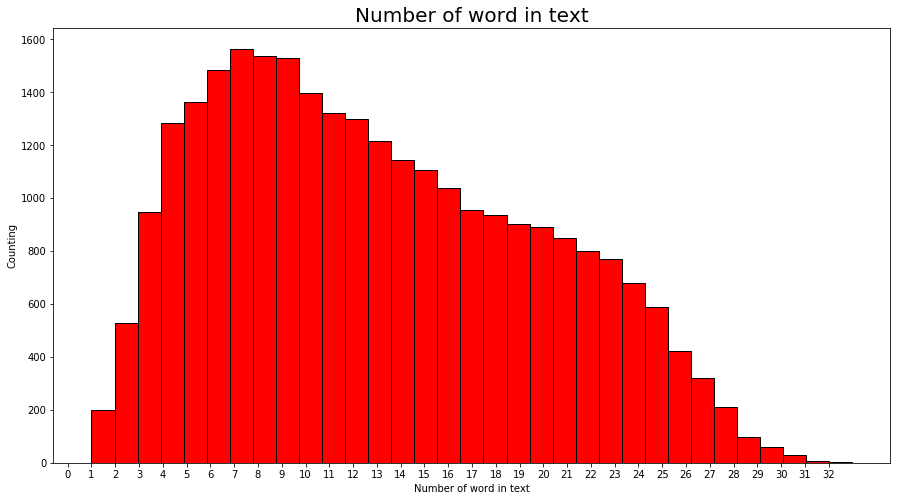

In [24]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in T',bins=33,data=train,edgecolor='black',color='red')
plt.title('Number of word in text',fontsize=20)
plt.xlabel('Number of word in text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

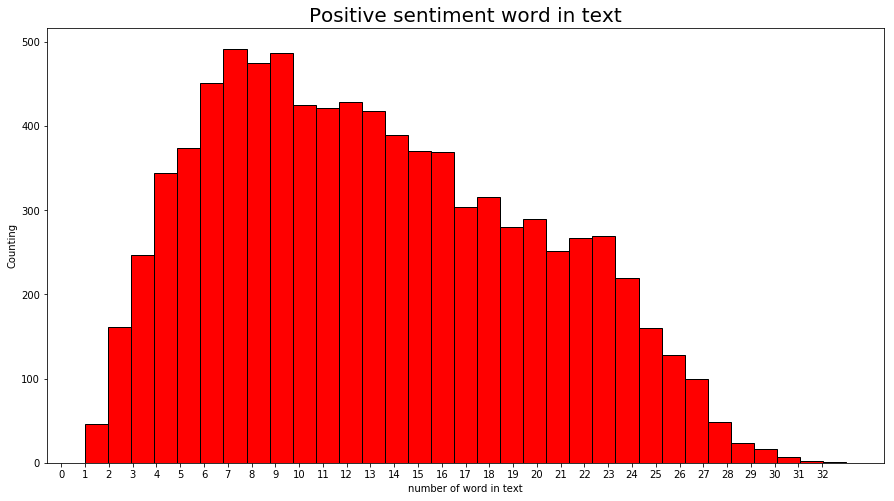

In [25]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in T',bins=33,data=positive,edgecolor='black',color='red')
plt.title('Positive sentiment word in text',fontsize=20)
plt.xlabel('number of word in text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

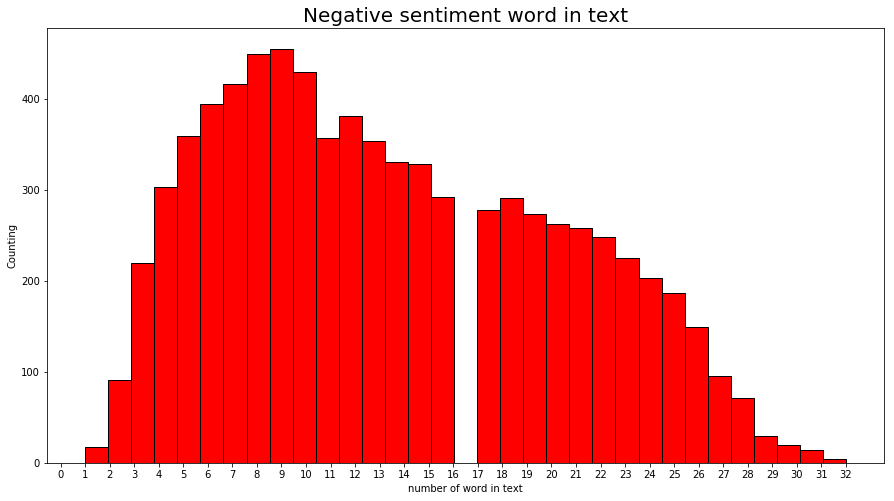

In [26]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in T',bins=33,data=negative,edgecolor='black',color='red')
plt.title('Negative sentiment word in text',fontsize=20)
plt.xlabel('number of word in text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

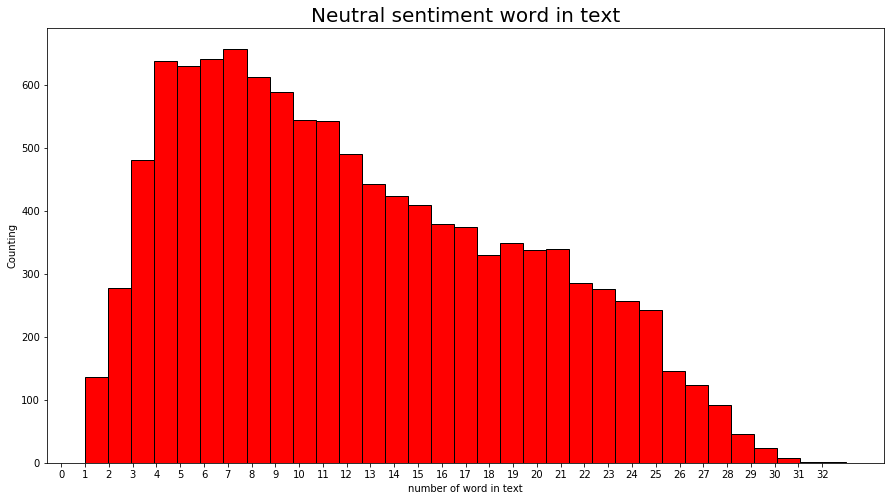

In [27]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in T',bins=33,data=neutral,edgecolor='black',color='red')
plt.title('Neutral sentiment word in text',fontsize=20)
plt.xlabel('number of word in text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

Observation

> Distribution without sentiment filtering and with filtering are showing very similar tendecy.

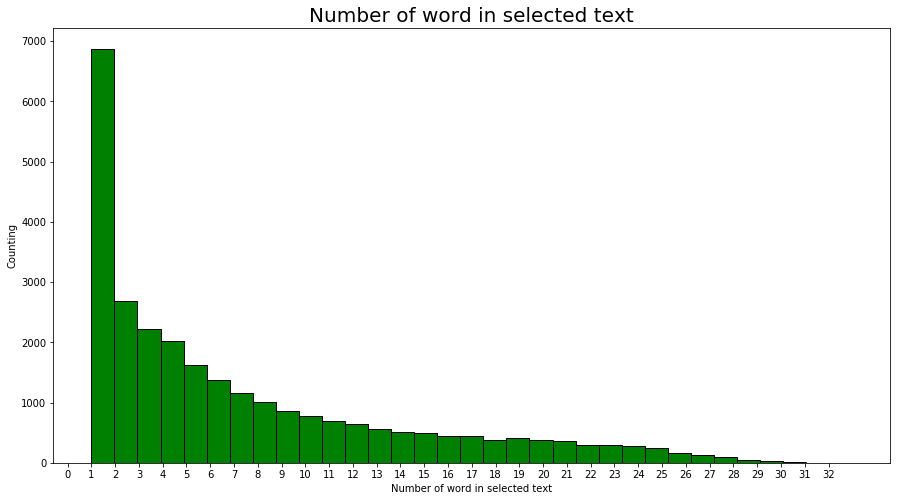

In [28]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in ST',bins=33,data=train,edgecolor='black',color='green')
plt.title('Number of word in selected text',fontsize=20)
plt.xlabel('Number of word in selected text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

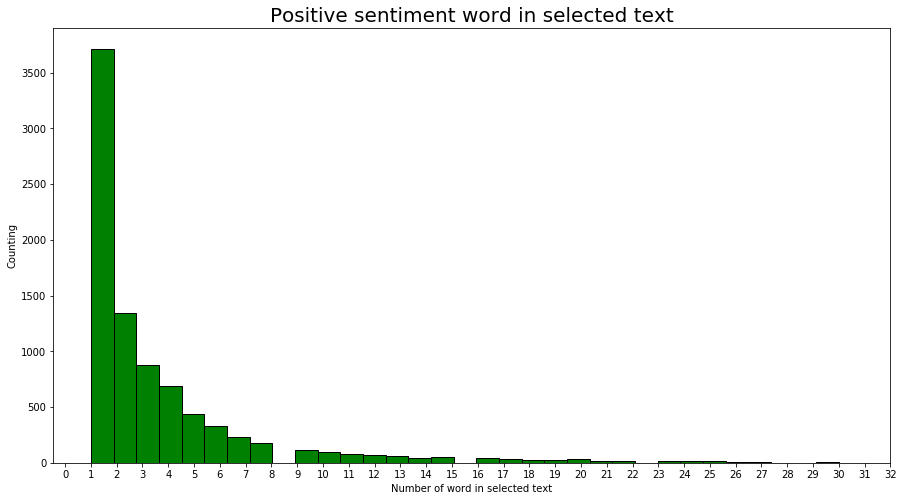

In [29]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in ST',bins=33,data=positive,edgecolor='black',color='green')
plt.title('Positive sentiment word in selected text',fontsize=20)
plt.xlabel('Number of word in selected text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

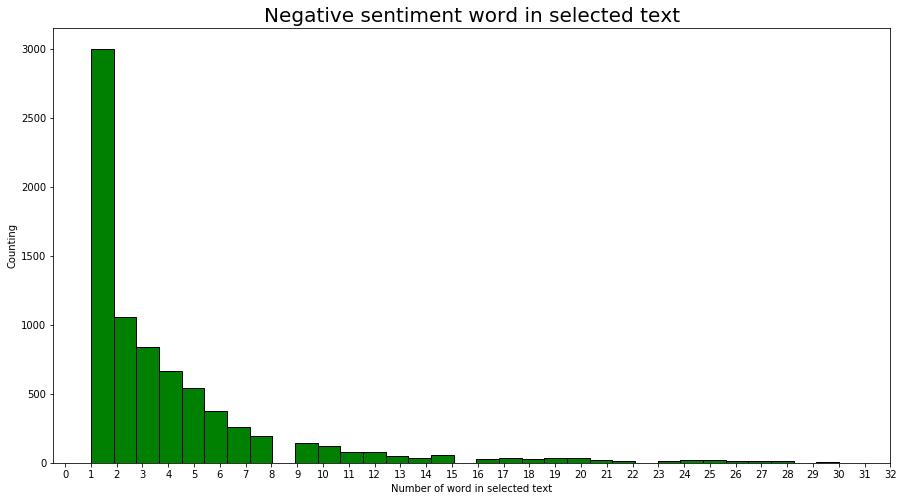

In [30]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in ST',bins=33,data=negative,edgecolor='black',color='green')
plt.title('Negative sentiment word in selected text',fontsize=20)
plt.xlabel('Number of word in selected text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

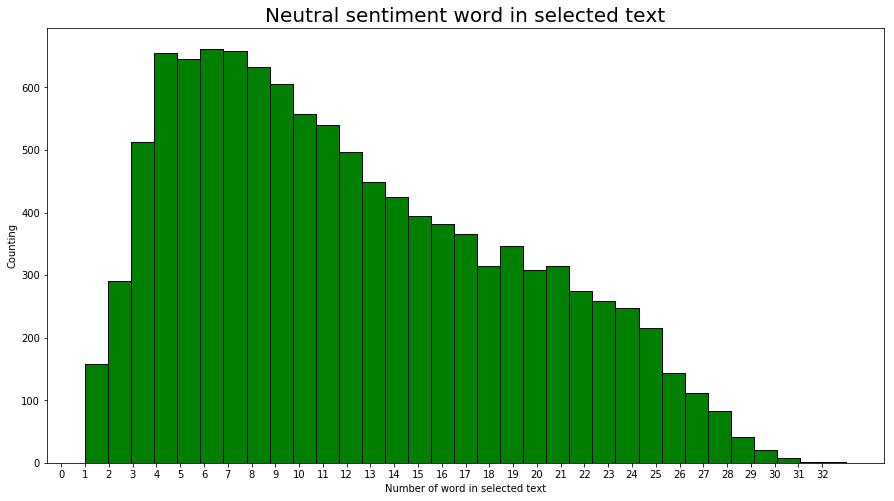

In [31]:
plt.subplots(figsize=(15,8))
plt.hist(x='number of word in ST',bins=33,data=neutral,edgecolor='black',color='green')
plt.title('Neutral sentiment word in selected text',fontsize=20)
plt.xlabel('Number of word in selected text')
plt.ylabel('Counting')
x1 = list(range(0,33,1))
plt.xticks(x1);

Observation 

> Unlike text column, selected text has one exception. Without neutral sentiment graphs represent strong right skewed distribution.But neutral sentiment is showing different shape which is almost same tendency like text column

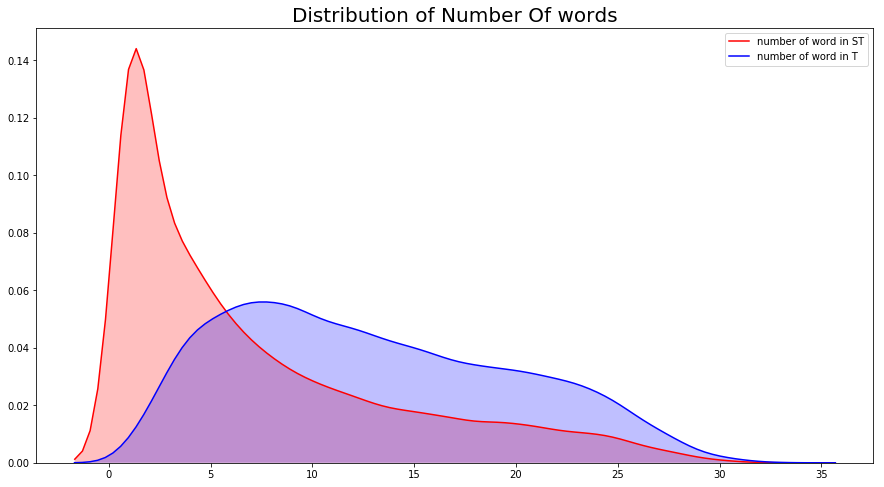

In [32]:
plt.figure(figsize=(15,8))
p1=sns.kdeplot(train['number of word in ST'], shade=True, color="r")
p1.set_title('Distribution of Number Of words',fontsize=20)
p1=sns.kdeplot(train['number of word in T'], shade=True, color="b");

Observation

> Remarkably different distribution of `number of word from text` and `number of word from selectec text`

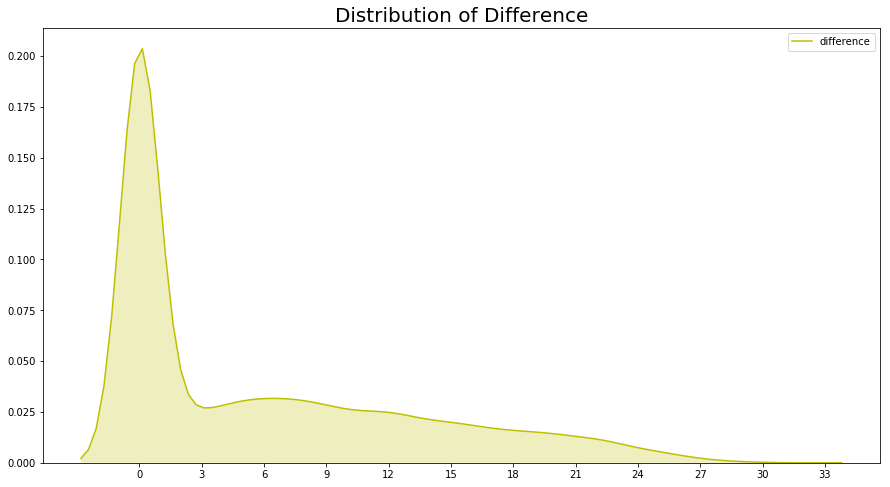

In [33]:
plt.figure(figsize=(15,8))
p1=sns.kdeplot(train['difference'], shade=True, color="y")
p1.set_title('Distribution of Difference',fontsize=20)
x1 = list(range(0,35,3))
plt.xticks(x1);

Observation 

> about 20% of word difference is zero.That mean 20% of selected text are 100% same as text.

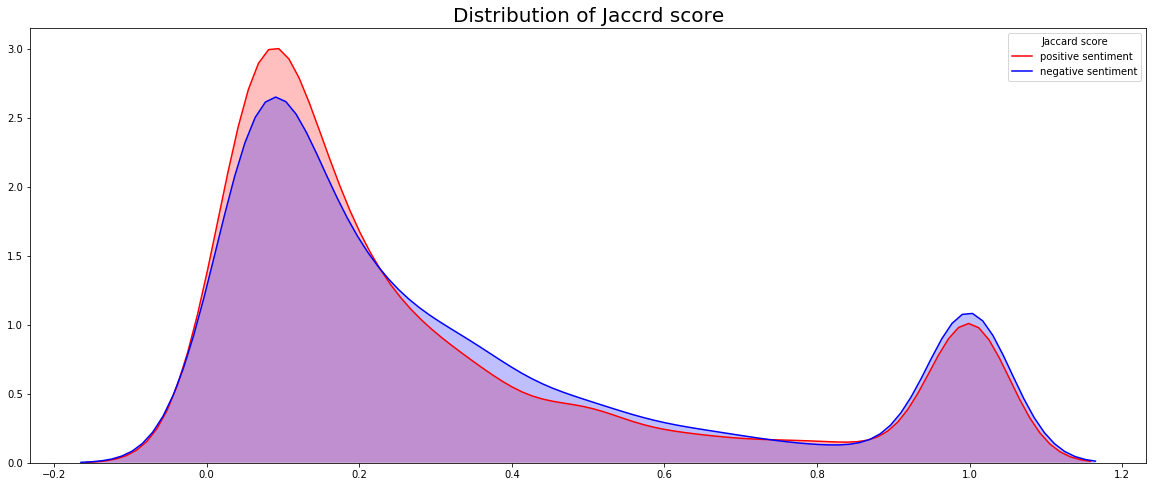

In [34]:
plt.figure(figsize=(20,8))
p1=sns.kdeplot(train[train['sentiment']=='positive']['jaccard score'], shade=True, color="r").set_title('Distribution of Jaccrd score',fontsize=20)
p1=sns.kdeplot(train[train['sentiment']=='negative']['jaccard score'], shade=True, color="b")
plt.legend(['positive sentiment','negative sentiment'],title='Jaccard score');

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 0.98, 'number of word in Text and selected Text')

<Figure size 1080x1080 with 0 Axes>

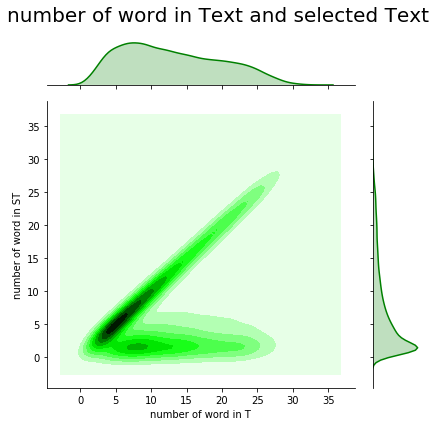

In [35]:
plt.figure(figsize=(15,15))
g=sns.jointplot("number of word in T", "number of word in ST", data=train,kind="kde", space=0, color="g");
g.fig.suptitle("number of word in Text and selected Text",fontsize=20)

# Format nicely.
g.fig.tight_layout()

#Reduce plot to make room for suptitle
g.fig.subplots_adjust(top=0.9)
plt.show()

<a name="sec3"></a>
# 3. Text data preprocessing

<a name="sec3.1"></a>
## 3.1 Stemming

stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form

Like here

- sleeping -> sleep
- sleepy -> sleep

In [36]:
from nltk.stem import SnowballStemmer

def stemming(words):
    s = SnowballStemmer('english')
    s.stem(words)
    return words 

In [37]:
train['text'] = train['text'].apply(lambda x: stemming(x))
test['text'] = test['text'].apply(lambda x:stemming(x))
train['selected_text'] = train['selected_text'].apply(lambda x: stemming(x))

<a name="sec3.2"></a>
## 3.2 Contraction mapping

Contraction are shortened version of words or syllables. By nature, contraction pose a problem for NLP and text analysis because we have a special apostrophe character in the word. Hence, there should be some definitve process by which we can deal with contractions when processing text. 

In [38]:
"""
Expanding contraction 
"""
dic = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" };

In [39]:
def mapping_replacer(x, dic): 
    for word in dic.keys(): 
        if " " + word + " " in x: 
            x = x.replace(" " + word + " ", " " + dic[word] + " ")
    return x

In [40]:
train['text'] = train['text'].apply(lambda x:mapping_replacer(x,dic))
train['selected_text'] = train['selected_text'].apply(lambda x:mapping_replacer(x,dic))
test['text'] = test['text'].apply(lambda x:mapping_replacer(x,dic))

<a name="sec3.3"></a>
## 3.3 Cleaning Corpus 

Preprocessig is the process which cleans the data to get all in a consistent format and  accurate prediction score. So this process is directly connected with the model result. We need to clean,tokenize and convert data into the matric form 

* make a lowercase
* remove text in square brackets
* reomve hyperlin,HTML
* remove punctuation
* remove line change
* remove words containig numbers

For that we need special libraries 

<a name="sec3.4"></a>
## 3.4 Tokenization

Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens. I'll show 4 famous Tokenization methods

<div align='left'><font size="3" color="#51ABDA">Wordtokenizer</font></div>
split the token by white space

<div align='left'><font size="3" color="#51ABDA">Treebanktokenizer</font></div>
1.split standard contractions, e.g. don't -> do n't and they'll -> they 'll

2.treat most punctuation characters as separate tokens

3.split off commas and single quotes, when followed by whitespace

4.separate periods that appear at the end of line

<div align='left'><font size="3" color="#51ABDA">WordPunctTokenizer</font></div>
split the token by punctuation

<div align='left'><font size="3" color="#51ABDA">RegexpTokenizer</font></div>
A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.



<hr>

In this we'll use `RegexpTokenizer`

In [41]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [42]:
########################### Cleaning Corpus ####################################

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    # make a lowercase 

    # re.sub(pattern,repl,string) 
    # find corresponded pattern from string convert to repl
    
    
    text = re.sub('\[.*?\]', '', text)
    #remove text in square brackets
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    # remove Hyperlink,HTML 
    
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # remove punctuation
    
    text = re.sub('\n', '', text)
    # remove line change

    text = re.sub('\w*\d\w*', '', text)
    # remove words containing numbers.

    return text

########################### Tokenization ####################################


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [43]:

# Applying the cleaning function to both test and training datasets
train['text'] = train['text'].apply(str).apply(lambda x: text_preprocessing(x))
test['text'] = test['text'].apply(str).apply(lambda x: text_preprocessing(x))
train['selected_text'] = train['selected_text'].apply(str).apply(lambda x: text_preprocessing(x))


# Let's take a look at the updated text
train.head()

,textID,text,selected_text,sentiment,jaccard score,number of word in T,number of word in ST,difference
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,1.000000,7,7,0
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,0.200000,10,2,8
2,088c60f138,my boss is bullying me,bullying me,negative,0.166667,5,2,3
3,9642c003ef,what interview leave me alone,leave me alone,negative,0.600000,5,3,2
4,358bd9e861,sons of why couldnt they put them on the relea...,sons of,negative,0.214286,14,3,11


<a name="sec3.5"></a>
## 3.5 Removing Stopwords


- This part can be belonged to the `Part 4.1`.But personally I want to show it separately because for removing stopwords we need to use special libraires.

- Stopword is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

- The reason for ignoring is that those words are not cruial component of the **sentiment analysis**. In other words stopwords have no meaning ,which is related to sentiment or expression


**Notice** 

In order to remve stopswords we have to split word by word. If you compile function without spliting words. your text table will be splited by alphabet.So don't forget to do it !!! 

In [44]:
# Step 1 split word by word

def tokenizer(text):
    word_tokens = word_tokenize(text)
    return word_tokens

'''
Alternative of def tokenizer(text)

# from collections import Counter
# train['word'] = train['selected_text'].apply(lambda x:str(x).split())
'''

train['word from ST'] = train['selected_text'].apply(str).apply(lambda x: tokenizer(x))
train['word from T'] = train['text'].apply(str).apply(lambda x: tokenizer(x))



"\nAlternative of def tokenizer(text)\n\n# from collections import Counter\n# train['word'] = train['selected_text'].apply(lambda x:str(x).split())\n"

In [45]:
# Step 2 remove stopwords 

def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
train['word from ST'] = train['word from ST'].apply(lambda x:remove_stopword(x))
train['word from T'] = train['word from T'].apply(lambda x: remove_stopword(x))

In [46]:
train.head()

,textID,text,selected_text,sentiment,jaccard score,number of word in T,number of word in ST,difference,word from ST,word from T
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,1.000000,7,7,0,"[id, responded, going]","[id, responded, going]"
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,0.200000,10,2,8,"[sooo, sad]","[sooo, sad, miss, san, diego]"
2,088c60f138,my boss is bullying me,bullying me,negative,0.166667,5,2,3,[bullying],"[boss, bullying]"
3,9642c003ef,what interview leave me alone,leave me alone,negative,0.600000,5,3,2,"[leave, alone]","[interview, leave, alone]"
4,358bd9e861,sons of why couldnt they put them on the relea...,sons of,negative,0.214286,14,3,11,[sons],"[sons, couldnt, put, releases, already, bought]"


Observation

> Now we are ready for Word data Analysis 

<a name="sec4"></a>
# 4. Word data Analysis

<a name="sec4.1"></a>
## 4.1 Frequencey 

In [47]:
from collections import Counter

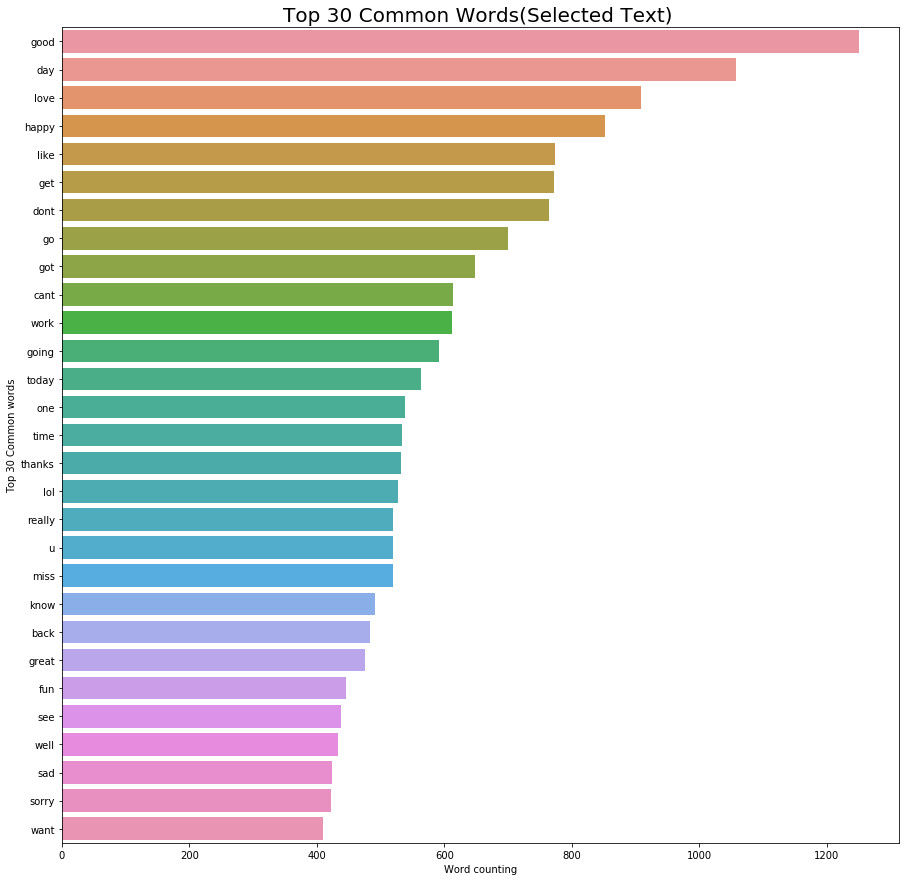

In [48]:
counting = Counter([item for sublist in train['word from ST'] for item in sublist])
counting_table = pd.DataFrame(counting.most_common(30))
counting_table.drop([0],inplace=True)
counting_table.columns = ['word','counting']

plt.figure(figsize=(15,15))
ax= sns.barplot(data=counting_table,y='word',x='counting')
ax.set_title('Top 30 Common words(selected text) '.title(),fontsize=20)

ax.set_xlabel('Word counting')
ax.set_ylabel('Top 30 Common words');

Observation 
> Common word from selected text column : `good` >> `day` >> `love` ...

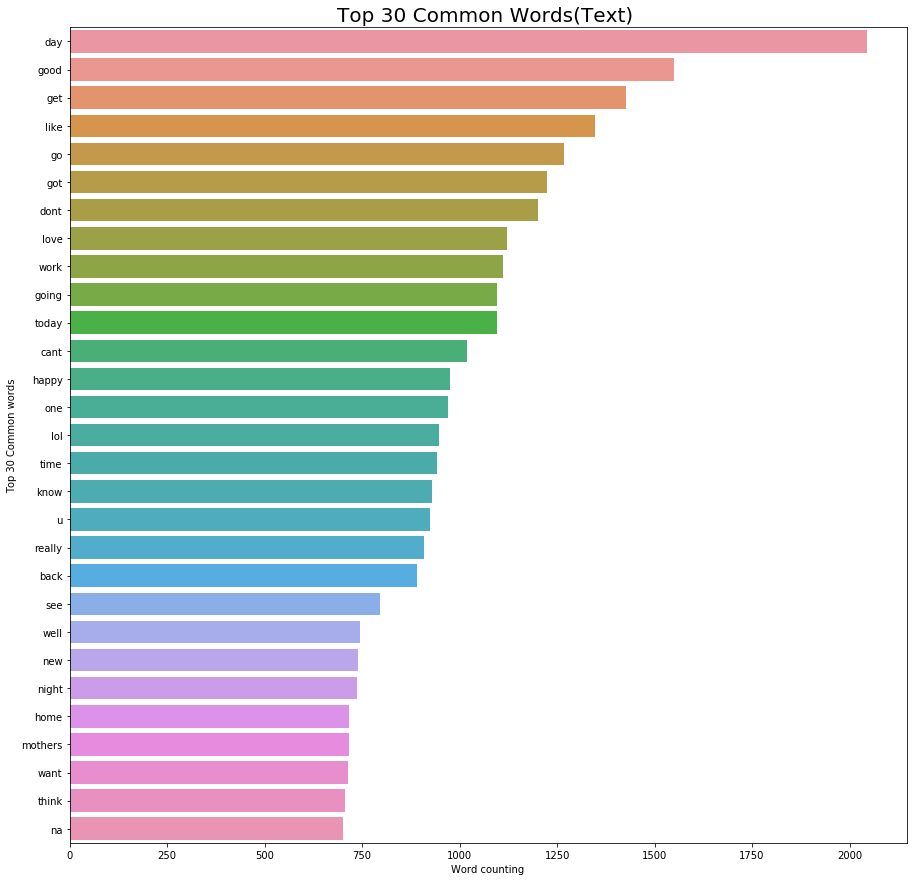

In [49]:
counting = Counter([item for sublist in train['word from T'] for item in sublist])
counting_table = pd.DataFrame(counting.most_common(30))
counting_table.drop([0],inplace=True)
counting_table.columns = ['word','counting']

plt.figure(figsize=(15,15))
ax= sns.barplot(data=counting_table,y='word',x='counting')
ax.set_title('Top 30 Common words(text) '.title(),fontsize=20)

ax.set_xlabel('Word counting')
ax.set_ylabel('Top 30 Common words');

Observation 
> Common word from text column : `day` >> `good` >> `get` ...

In [50]:
positive = train[train['sentiment']=='positive']
negative = train[train['sentiment']=='negative']
neutral = train[train['sentiment']=='neutral']

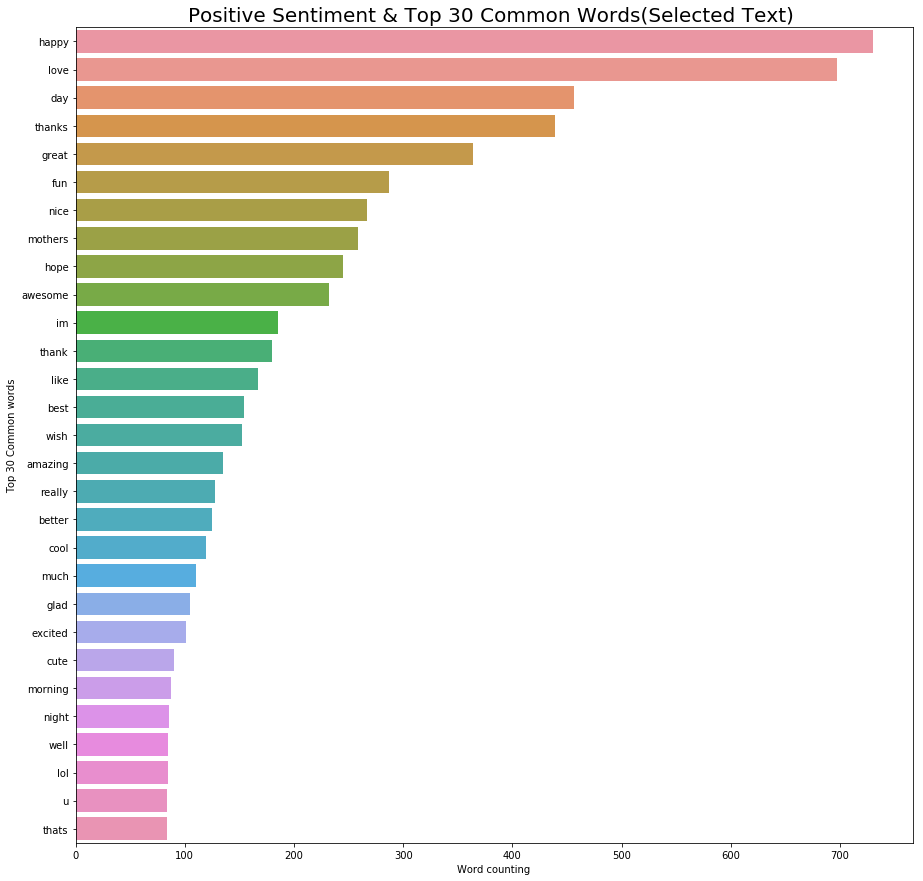

In [51]:
counting_positive_ST = Counter([item for sublist in positive['word from ST'] for item in sublist])
counting_positive_ST = pd.DataFrame(counting_positive_ST.most_common(30))
counting_positive_ST.drop([0],inplace=True)
counting_positive_ST.columns = ['word','counting']

plt.figure(figsize=(15,15))
ax= sns.barplot(data=counting_positive_ST,y='word',x='counting')
ax.set_title('Positive sentiment & Top 30 Common words(selected text) '.title(),fontsize=20)

ax.set_xlabel('Word counting')
ax.set_ylabel('Top 30 Common words');

Observation
> Positive sentiemnt & Common word from selected text column : `happy` >> `love` >> `day`>> `thanks` ...

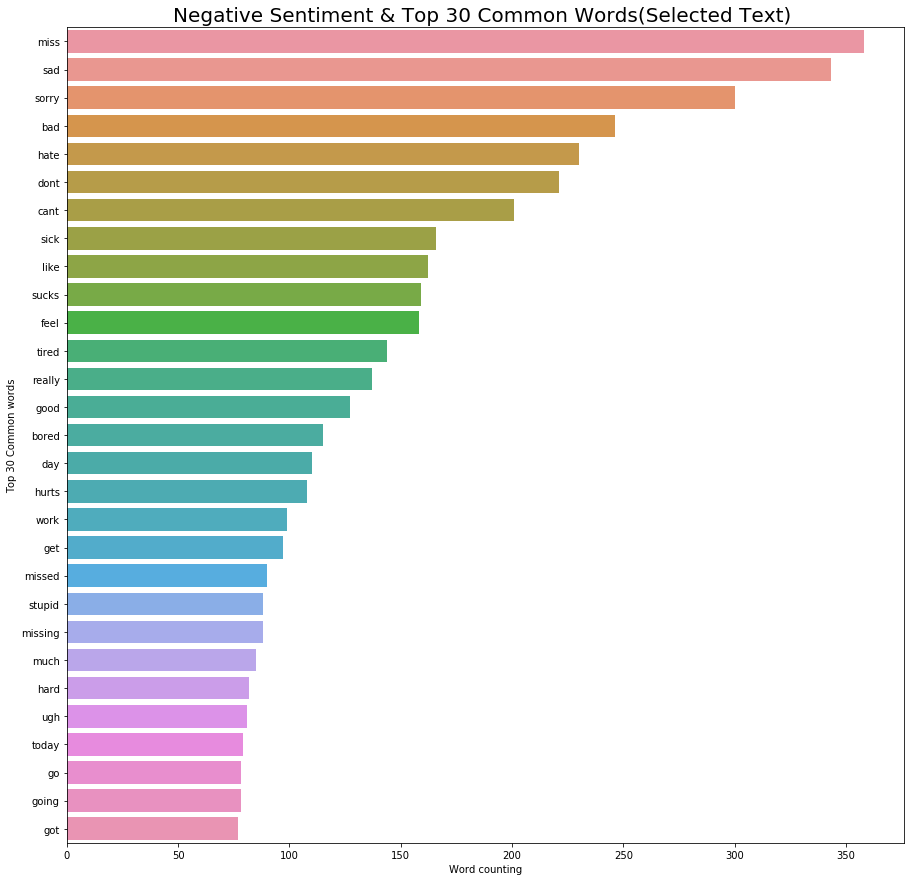

In [52]:
counting_negative_ST = Counter([item for sublist in negative['word from ST'] for item in sublist])
counting_negative_ST = pd.DataFrame(counting_negative_ST.most_common(30))
counting_negative_ST.drop([0],inplace=True)
counting_negative_ST.columns = ['word','counting']

plt.figure(figsize=(15,15))
ax= sns.barplot(data=counting_negative_ST,y='word',x='counting')
ax.set_title('negative sentiment & Top 30 Common words(selected text) '.title(),fontsize=20)

ax.set_xlabel('Word counting')
ax.set_ylabel('Top 30 Common words');

Observation
> negative sentiemnt & Common word from selected text column : `miss` >> `sad` >> `sorry`>> `bad` ...

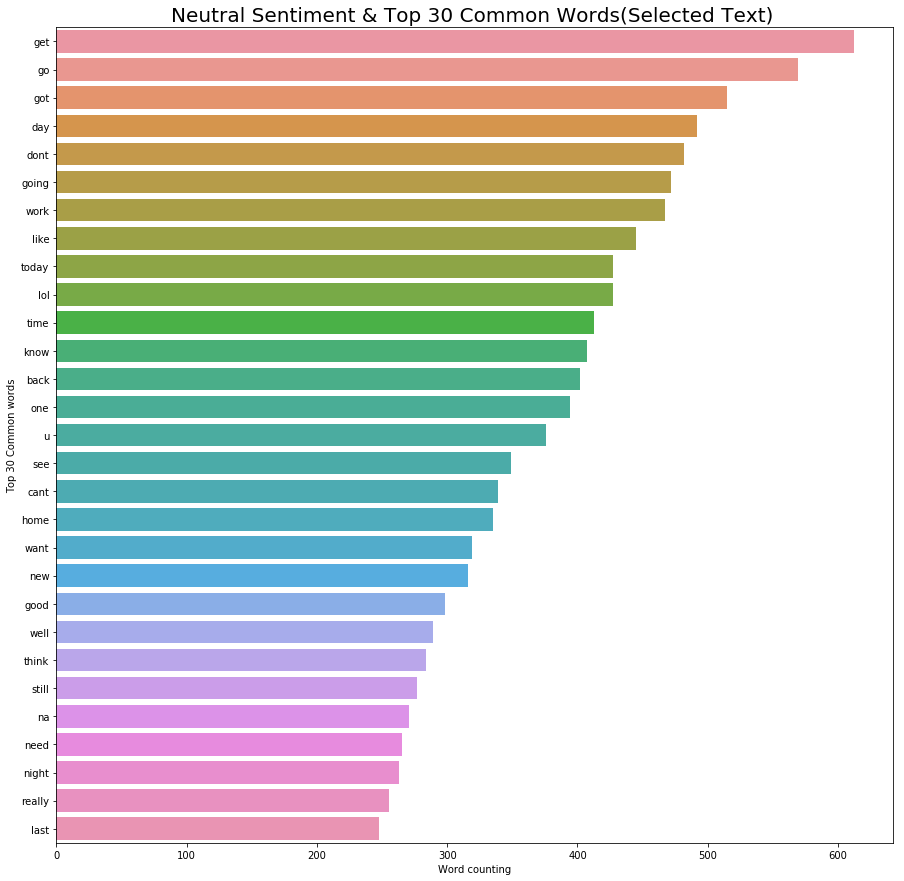

In [53]:
counting_neutral_ST = Counter([item for sublist in neutral['word from ST'] for item in sublist])
counting_neutral_ST = pd.DataFrame(counting_neutral_ST.most_common(30))
counting_neutral_ST.drop([0],inplace=True)
counting_neutral_ST.columns = ['word','counting']

plt.figure(figsize=(15,15))
ax= sns.barplot(data=counting_neutral_ST,y='word',x='counting')
ax.set_title('neutral sentiment & Top 30 Common words(selected text) '.title(),fontsize=20)

ax.set_xlabel('Word counting')
ax.set_ylabel('Top 30 Common words');

Observation
> neutral sentiemnt & Common word from selected text column : `get` >> `go` >> `got`...

<a name="sec4.2"></a>
## 4.2 Word Cloud

In [54]:
positive_text = train[train['sentiment'] == 'positive']['selected_text']
negative_text = train[train['sentiment'] == 'negative']['selected_text']
neutral_text = train[train['sentiment'] == 'neutral']['selected_text']

In [55]:
from wordcloud import WordCloud
from PIL import Image

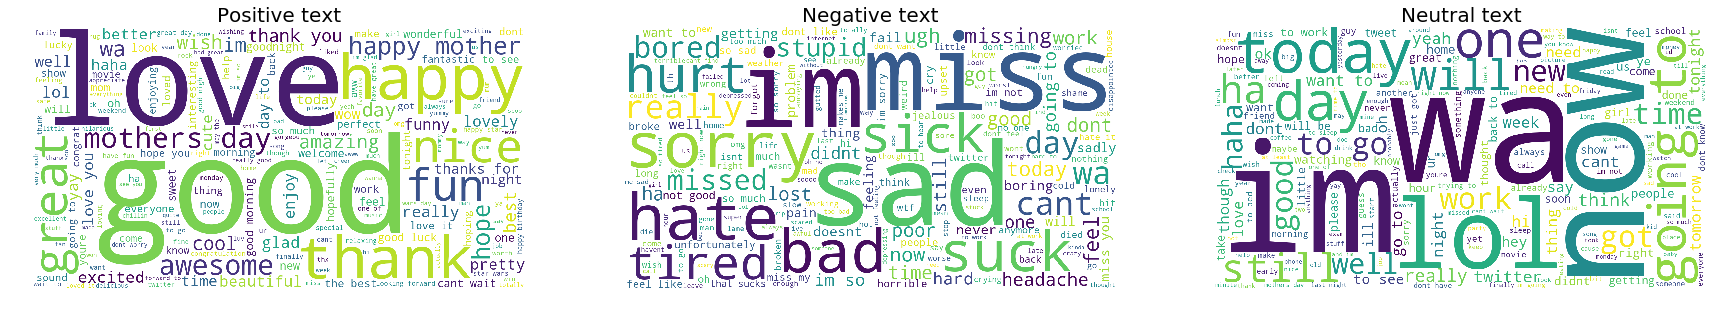

In [56]:
from wordcloud import WordCloud
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
wordcloud1 = WordCloud( background_color='white',
                        width=1500,
                        height=800).generate(" ".join(positive_text))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive text',fontsize=20);

wordcloud2 = WordCloud( background_color='white',
                        width=1500,
                        height=800).generate(" ".join(negative_text))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative text',fontsize=20);

wordcloud3 = WordCloud( background_color='white',
                        width=1500,
                        height=800).generate(" ".join(neutral_text))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral text',fontsize=20);

<a id='sec5'></a>
# 5. PLUS 

<a name="sec5.1"></a>
## 5.1 Spelling correction


Actually we have also check wthether the spelling is correct or not
For that I'll use the concept of [How to Write a Spelling Corrector from Peter Norvig](http://norvig.com/spell-correct.html).Unfortunately it's not able to compile it. Because we don't have the txt file called `big.txt`. you can find this file above

In [57]:
'''
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))
    
    
'''

'\nimport re\nfrom collections import Counter\n\ndef words(text): return re.findall(r\'\\w+\', text.lower())\n\nWORDS = Counter(words(open(\'big.txt\').read()))\n\ndef P(word, N=sum(WORDS.values())): \n    "Probability of `word`."\n    return WORDS[word] / N\n\ndef correction(word): \n    "Most probable spelling correction for word."\n    return max(candidates(word), key=P)\n\ndef candidates(word): \n    "Generate possible spelling corrections for word."\n    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])\n\ndef known(words): \n    "The subset of `words` that appear in the dictionary of WORDS."\n    return set(w for w in words if w in WORDS)\n\ndef edits1(word):\n    "All edits that are one edit away from `word`."\n    letters    = \'abcdefghijklmnopqrstuvwxyz\'\n    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]\n    deletes    = [L + R[1:]               for L, R in splits if R]\n    transposes = [L + R[1] + R[0] + R[2:] for L, R i

**Notice**

As I mentioned before this code is not working because `big.txt` isn't in the repository.

<a name="sec5.2"></a>
## 5.2 Remove weird spaces

You can also remove weird spaces in the sentence 

In [58]:
'''
def remove_space(text): 
    text = text.strip() 
    text = text.split() 
    return " ".join(text)

'''

'\ndef remove_space(text): \n    text = text.strip() \n    text = text.split() \n    return " ".join(text)\n\n'

<a id='sec6'></a>
# 6. Ending

Thanks for your reading my kernal.Because I'm kaggle newcomer i need much more time to practice in order to improve my kernal.
In the next time I'll make a second part of `Tweet sentiment` which is modeling and prediction of NLP.